In [1]:
import pandas as pd
# import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d, interp2d, RegularGridInterpolator
from astropy.io import fits
from astropy.coordinates import SkyCoord
from gammapy.stats import WStatCountsStatistic
from astropy.table import Table
sns.set_palette("colorblind")


In [4]:
hdul_1 = fits.open("fits/65776.mscw.fits")
hdul_2 = fits.open("fits/67253.mscw.fits")

In [5]:
df_1 = Table.read(hdul_1[1]).to_pandas()
df_2 = Table.read(hdul_2[1]).to_pandas()

In [19]:
df_1

,runNumber,EVENT_ID,MJD,Time,TargetElev,TargetAz,TargetDec,TargetRA,WobbleN,WobbleE,...,size2_1,loss_2,tgrad_x_2,size2_2,loss_3,tgrad_x_3,size2_3,RA,DEC,El
0,65776,4,56297,14286.164598,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-0.505117,773.645691,0.000000,0.767691,287.566650,84.596442,23.250065,61.252655
1,65776,9,56297,14286.172155,0.0,0.0,0.0,0.0,0.0,0.0,...,1262.598389,0.000000,0.000000,0.000000,0.000000,1.156151,347.838837,84.617965,22.118551,60.759599
2,65776,11,56297,14286.179506,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-0.030522,855.794006,0.000000,1.756817,295.765106,84.889260,21.219816,60.134082
3,65776,15,56297,14286.194209,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.051408,0.877440,3008.438477,0.080102,-0.368114,1554.525391,84.488793,23.136646,61.297004
4,65776,18,56297,14286.200829,0.0,0.0,0.0,0.0,0.0,0.0,...,658.685669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,85.243505,21.049861,59.762593
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270697,65776,781024,56297,16088.882952,0.0,0.0,0.0,0.0,0.0,0.0,...,854.350037,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,81.925273,21.288237,68.654861
270698,65776,781026,56297,16088.888629,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.050238,-0.741998,1208.917969,0.000000,0.000000,0.000000,83.144278,21.964093,68.055754
270699,65776,781028,56297,16088.896143,0.0,0.0,0.0,0.0,0.0,0.0,...,327.926483,0.000000,-5.769409,239.635956,0.000000,-6.046000,240.375992,83.687776,21.091908,67.167960
270700,65776,781031,56297,16088.915343,0.0,0.0,0.0,0.0,0.0,0.0,...,228.094559,0.000000,0.000000,0.000000,0.000000,-2.569752,183.531082,85.135239,21.311830,66.132476


In [21]:
import pickle

In [22]:
model_path = 'NN_train.sav'

with open(model_path, 'rb') as model_file:
    model = pickle.load(model_file)

2023-08-10 14:43:47.525322: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-10 14:43:47.642788: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 14:43:48.271026: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-10 14:43:48.276624: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-10 14:43:55.044852: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [23]:
run1 = df_1[['MSCW', 'MSCL', 'EChi2S', 'EmissionHeight','EmissionHeightChi2', 'SizeSecondMax', 'Core']]

run1['EChi2S'] = np.log10(run1['EChi2S'])
run1['EmissionHeightChi2'] = np.log10(run1['EmissionHeightChi2'])
run1['SizeSecondMax'] = np.log10(run1['SizeSecondMax'])

/home/marynaskew/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/marynaskew/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipykernel_943/667622471.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run1['EChi2S'] = np.log10(run1['EChi2S'])
/tmp/ipykernel_943/667622471.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
#run1 = run1[np.logical_and(run1['EChi2S']>-6.0,run1['EChi2S']<4.0)]
#run1 = run1[np.logical_and(run1['EmissionHeightChi2']>-6.0,run1['EmissionHeightChi2']<4.0)]
#run1 = run1[np.logical_and(run1['SizeSecondMax']>-0.0,run1['SizeSecondMax']<5.0)]

In [24]:
predictions = model.predict(run1)

8460/8460 [==============================] - 17s 2ms/step


In [26]:
threshold = 0.5  # Adjust this threshold based on your model and problem
sig_indices = np.where(predictions > threshold)[0]
bkg_indices = np.where(predictions <= threshold)[0]
sig_indices, bkg_indices

(array([     0,      1,      2, ..., 270698, 270700, 270701]),
 array([     6,      9,     17, ..., 270674, 270676, 270699]))

In [39]:
df_1['prob'] = predictions
df_1['class'] = np.zeros(len(predictions))
df_1.loc[sig_indices, 'class'] = 1
df_1

,runNumber,EVENT_ID,MJD,Time,TargetElev,TargetAz,TargetDec,TargetRA,WobbleN,WobbleE,...,tgrad_x_2,size2_2,loss_3,tgrad_x_3,size2_3,RA,DEC,El,prob,class
0,65776,4,56297,14286.164598,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.505117,773.645691,0.000000,0.767691,287.566650,84.596442,23.250065,61.252655,0.941417,1.0
1,65776,9,56297,14286.172155,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,1.156151,347.838837,84.617965,22.118551,60.759599,0.990507,1.0
2,65776,11,56297,14286.179506,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.030522,855.794006,0.000000,1.756817,295.765106,84.889260,21.219816,60.134082,0.999969,1.0
3,65776,15,56297,14286.194209,0.0,0.0,0.0,0.0,0.0,0.0,...,0.877440,3008.438477,0.080102,-0.368114,1554.525391,84.488793,23.136646,61.297004,0.887683,1.0
4,65776,18,56297,14286.200829,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,85.243505,21.049861,59.762593,0.968568,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270697,65776,781024,56297,16088.882952,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,81.925273,21.288237,68.654861,1.000000,1.0
270698,65776,781026,56297,16088.888629,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.741998,1208.917969,0.000000,0.000000,0.000000,83.144278,21.964093,68.055754,0.999999,1.0
270699,65776,781028,56297,16088.896143,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.769409,239.635956,0.000000,-6.046000,240.375992,83.687776,21.091908,67.167960,0.200516,0.0
270700,65776,781031,56297,16088.915343,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,-2.569752,183.531082,85.135239,21.311830,66.132476,0.999219,1.0


In [43]:
crab = SkyCoord.from_name("Crab")

prob = np.linspace(0,1,50)


on_counts = np.zeros(prob.shape)
off_counts = np.zeros(prob.shape)
excess_counts = np.zeros(prob.shape)
alpha = np.zeros(prob.shape)
sigma = np.zeros(prob.shape)

for i in range(len(prob)):
    # Where prob is the probability of your classifier
    mask = df_1['prob'] > prob[i]
    
    myObs = Observation(df_1[mask])
    on_counts[i], off_counts[i], excess_counts[i], alpha[i], sigma[i] = myObs.get_signficance_at_region(crab)

[0. 1.]


In [7]:

# for working between sky and camera coordinates
ra_inter = interp1d(df_1["RA"], df_1["Xoff_derot"])
dec_inter = interp1d(df_1["DEC"], df_1["Yoff_derot"])


In [8]:
class Observation():
    
    def __init__(self, df):
        self.data = df
        # for working between sky and camera coordinates
        self.ra_inter = interp1d(df["RA"], df["Xoff_derot"])
        self.dec_inter = interp1d(df["DEC"], df["Yoff_derot"])
        
        # Some details on cuts
        self.theta_cut = 0.089
        self.exclude_radius = 0.3
        self.nregions = 10
        
        # Exclusions Regions
        self.exclude_x = []
        self.exclude_y = []

    def exclude_regions(self, regions):
        self.exclude_x = []
        self.exclude_y = []
        
        for reg in regions:
            self.exclude_x.append(self.ra_inter(reg.ra.deg))
            self.exclude_y.append(self.dec_inter(reg.dec.deg))
            
        self.exclude_x = np.array(self.exclude_x)
        self.exclude_y = np.array(self.exclude_y)
            
            
    def set_coords(self, ra_binning, dec_binning):
        self.ra = ra_binning
        self.dec = dec_binning
        
        self.ra_width = self.ra[1:] - self.ra[:-1]
        self.ra_center = self.ra[:-1] + 0.5 * self.ra_width
        self.dec_width = self.dec[1:] - self.dec[:-1]
        self.dec_center = self.dec[:-1] + 0.5 * self.dec_width
        
                
        self.on_map = np.zeros([
            len(self.ra_center),
            len(self.dec_center)
        ])
        
                
        self.off_map = np.zeros([
            len(self.ra_center),
            len(self.dec_center)
        ])
        
                
        self.alpha_map = np.zeros([
            len(self.ra_center),
            len(self.dec_center)
        ])
        
        self.sigma_map = np.zeros([
            len(self.ra_center),
            len(self.dec_center)
        ])
        
        
    
    def get_signficance_at_region(self, region):
        
        locX = self.ra_inter(region.ra.deg)
        locY = self.dec_inter(region.dec.deg)
        return self.get_signficance_at_pixel(locX, locY)
        
        
    def get_signficance_at_pixel(self, locX, locY):
        delta_angle = 360 / (self.nregions + 1)
        angles = np.rad2deg(np.arctan2( locY, locX,)) + (np.arange(1,self.nregions+1))* delta_angle

        x_off = np.cos(np.deg2rad(angles)) * (np.sqrt(locX**2 + locY**2))
        y_off = np.sin(np.deg2rad(angles)) * (np.sqrt(locX**2 + locY**2))
        
        on_mask = np.sqrt((self.data["Xoff_derot"] - locX)**2 + (self.data["Yoff_derot"] - locY)**2) < self.theta_cut

        
        off_mask = np.zeros(len(self.data), dtype=bool)
        alpha = 0
        for x, y in zip(x_off, y_off):

            ex_test = np.sqrt((self.exclude_x - x)**2 + (self.exclude_y - y)**2) < self.exclude_radius
            if np.any(ex_test):
                continue

            # Applying an "or" to get the total mask
            off_mask_tmp = np.sqrt((self.data["Xoff_derot"] - x)**2 + (self.data["Yoff_derot"] - y)**2) < self.theta_cut 
            off_mask += off_mask_tmp
            alpha += 1

        on_counts = len(self.data[on_mask])
        off_counts = len(self.data[off_mask])
        excess_counts = on_counts - off_counts / alpha
        sigma = WStatCountsStatistic(
                                on_counts,
                                off_counts,
                                1/alpha,
                            ).sqrt_ts

        return on_counts, off_counts, excess_counts, alpha, sigma
        

    def calculate_maps(self):
        
        for i in range(self.on_map.shape[0]):
            for j in range(self.on_map.shape[1]):
                
                # Get the pixel location
                locX = self.ra_inter(self.ra_center[i])
                locY = self.dec_inter(self.dec_center[j])

                # Exclude the inner most region of the camera
                if np.sqrt(locX**2 + locY**2) < 0.15:
                    continue
                    
                # Generate off regions
                delta_angle = 360 / (self.nregions + 1)
                angles = np.rad2deg(np.arctan2( locY, locX,)) + (np.arange(1,self.nregions+1))* delta_angle
                
                x_off = np.cos(np.deg2rad(angles)) * (np.sqrt(locX**2 + locY**2))
                y_off = np.sin(np.deg2rad(angles)) * (np.sqrt(locX**2 + locY**2))

                on_mask = np.sqrt((self.data["Xoff_derot"] - locX)**2 + (self.data["Yoff_derot"] - locY)**2) < self.theta_cut
                
                off_mask = np.zeros(len(self.data), dtype=bool)
                alpha = 0
                for x, y in zip(x_off, y_off):
                    
                    ex_test = np.sqrt((self.exclude_x - x)**2 + (self.exclude_y - y)**2) < self.exclude_radius
                    if np.any(ex_test):
                        continue
                    
                    # Applying an "or" to get the total mask
                    off_mask_tmp = np.sqrt((self.data["Xoff_derot"] - x)**2 + (self.data["Yoff_derot"] - y)**2) < self.theta_cut 
                    off_mask += off_mask_tmp
                    alpha += 1
                
                self.on_map[i,j] = len(self.data[on_mask])
                self.off_map[i,j] = len(self.data[off_mask])
                self.alpha_map[i,j] = 1./alpha
                
                self.sigma_map[i,j] = WStatCountsStatistic(
                                self.on_map[i,j],
                                self.off_map[i,j],
                                self.alpha_map[i,j],
                            ).sqrt_ts


In [10]:
myObs = Observation(df_1)
crab = SkyCoord.from_name("Crab")
myObs.exclude_regions([crab])

ra_bins = np.arange(crab.ra.deg - 1.5, crab.ra.deg + 1.5, 0.04)
dec_bins = np.arange(crab.dec.deg - 1.5, crab.dec.deg + 1.5, 0.04)

myObs.set_coords(ra_bins, dec_bins)

In [11]:
myObs.get_signficance_at_region(crab)

(1432, 7880, 447.0, 8, 12.469897150212784)

In [12]:
myObs.calculate_maps()

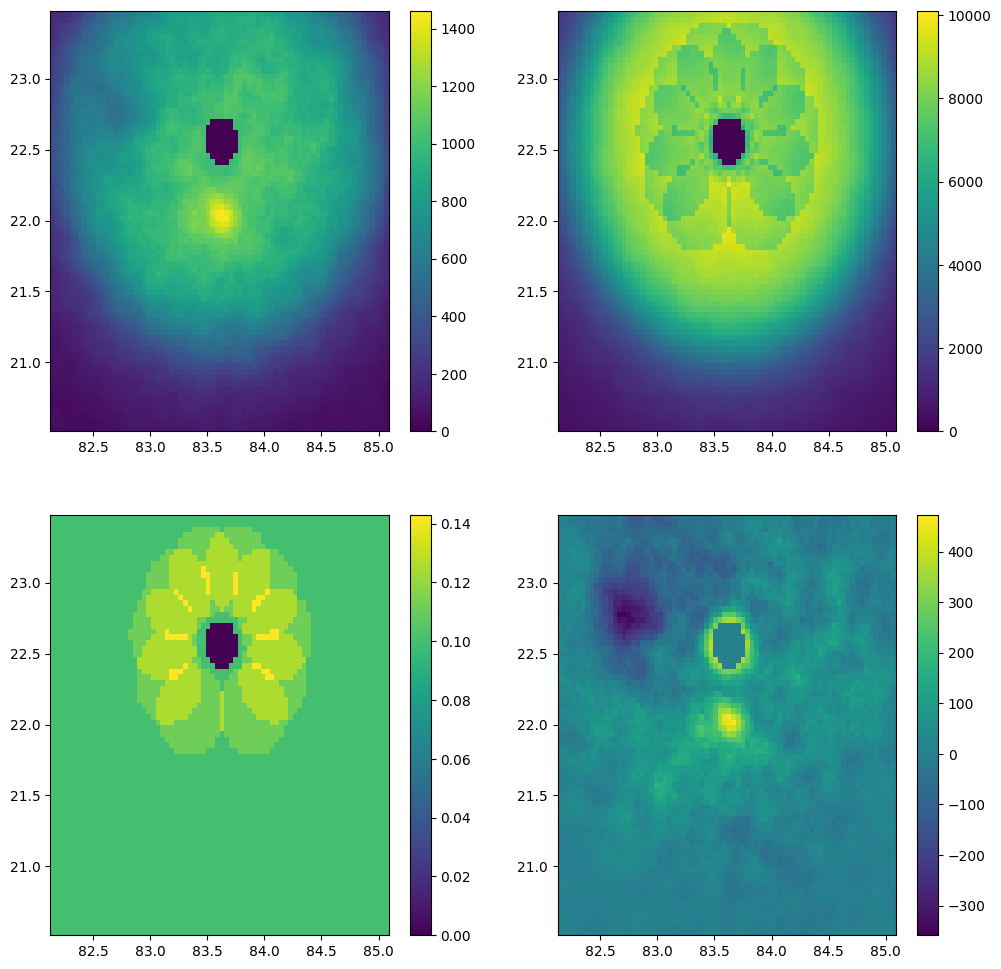

In [13]:
fig, axs = plt.subplots(2,2, figsize = (12,12))

p00= axs[0,0].pcolormesh(myObs.ra, myObs.dec, myObs.on_map)
plt.colorbar(p00, ax=axs[0,0])
p01= axs[0,1].pcolormesh(myObs.ra, myObs.dec, myObs.off_map)
plt.colorbar(p01, ax=axs[0,1])
p10= axs[1,0].pcolormesh(myObs.ra, myObs.dec, myObs.alpha_map)
plt.colorbar(p10, ax=axs[1,0])
p11= axs[1,1].pcolormesh(myObs.ra, myObs.dec, myObs.on_map - myObs.off_map * myObs.alpha_map)
plt.colorbar(p11, ax=axs[1,1])

In [14]:
class SkyMaps():
    
    def __init__(self, observations):
        
        self.observations = []
        for obs in observations:
            self.observations.append(Observation(obs))
            
    def exclude_regions(self, regions):
        for obs in self.observations:
            obs.exclude_regions(regions)
            
    def set_coords(self, ra_binning, dec_binning):
        for obs in self.observations:
            obs.set_coords(ra_binning, dec_binning)
            
            
    def get_signficance_at_region(self, region):
        on_counts = np.zeros(len(self.observations) + 1)
        off_counts = np.zeros(len(self.observations) + 1)
        excess_counts = np.zeros(len(self.observations) + 1)
        alpha = np.zeros(len(self.observations) + 1)
        sigma = np.zeros(len(self.observations) + 1)
        
        for i, obs in enumerate( self.observations):
            on_counts[i], off_counts[i], excess_counts[i], alpha[i], sigma[i]  = obs.get_signficance_at_region(region)
        
        on_counts[-1] = np.sum(on_counts[:-1])
        off_counts[-1] = np.sum(off_counts[:-1])
        excess_counts[-1] = np.sum(excess_counts[:-1])
        alpha[-1] = np.mean(alpha[:-1])
        sigma[-1] = WStatCountsStatistic(
                                on_counts[-1],
                                off_counts[-1],
                                1/alpha[-1],
                            ).sqrt_ts

        
        return on_counts, off_counts, excess_counts, alpha, sigma        
    
    
    
    def calculate_maps(self):
        
        for i, obs in enumerate(self.observations):
            obs.calculate_maps()
            if i == 0:
                self.on_map = obs.on_map
                self.off_map = obs.off_map
                self.alpha_map = np.zeros(obs.off_map.shape)
                self.excess_map = np.zeros(obs.off_map.shape)
                alpha_mask = (np.isfinite(obs.alpha_map)) & (obs.alpha_map > 0)

                self.alpha_map[alpha_mask] = 1./obs.alpha_map[alpha_mask]
                self.excess_map[alpha_mask] = obs.on_map[alpha_mask] + self.alpha_map[alpha_mask] * self.off_map[alpha_mask]
            
            else:
                alpha_mask = (np.isfinite(obs.alpha_map)) & (obs.alpha_map > 0)
                self.on_map[alpha_mask] += obs.on_map[alpha_mask]
                self.off_map[alpha_mask] += obs.off_map[alpha_mask]
                self.excess_map[alpha_mask] += obs.on_map[alpha_mask] + obs.alpha_map[alpha_mask] * obs.off_map[alpha_mask]
                self.alpha_map[alpha_mask] += 1./obs.alpha_map[alpha_mask]
                
        # Get the average alpha_map
        self.alpha_map /= len(self.observations)
        self.alpha_map = 1./ self.alpha_map
        self.sig_map = np.zeros(self.alpha_map.shape)
        
        # Get the significance
        for i in range(self.on_map.shape[0]):
            for j in range(self.on_map.shape[1]):
                self.sig_map[i,j] = WStatCountsStatistic(
                                self.on_map[i,j],
                                self.off_map[i,j],
                                self.alpha_map[i,j],
                            ).sqrt_ts


        

In [15]:
myMaps = SkyMaps([df_1, df_2])

myMaps.exclude_regions([crab])

ra_bins = np.arange(crab.ra.deg - 1.5, crab.ra.deg + 1.5, 0.05)
dec_bins = np.arange(crab.dec.deg - 1.5, crab.dec.deg + 1.5, 0.05)

myMaps.set_coords(ra_bins, dec_bins)

In [16]:
on, off, excess, alpha, sigma = myMaps.get_signficance_at_region(crab)


In [17]:
myMaps.calculate_maps()

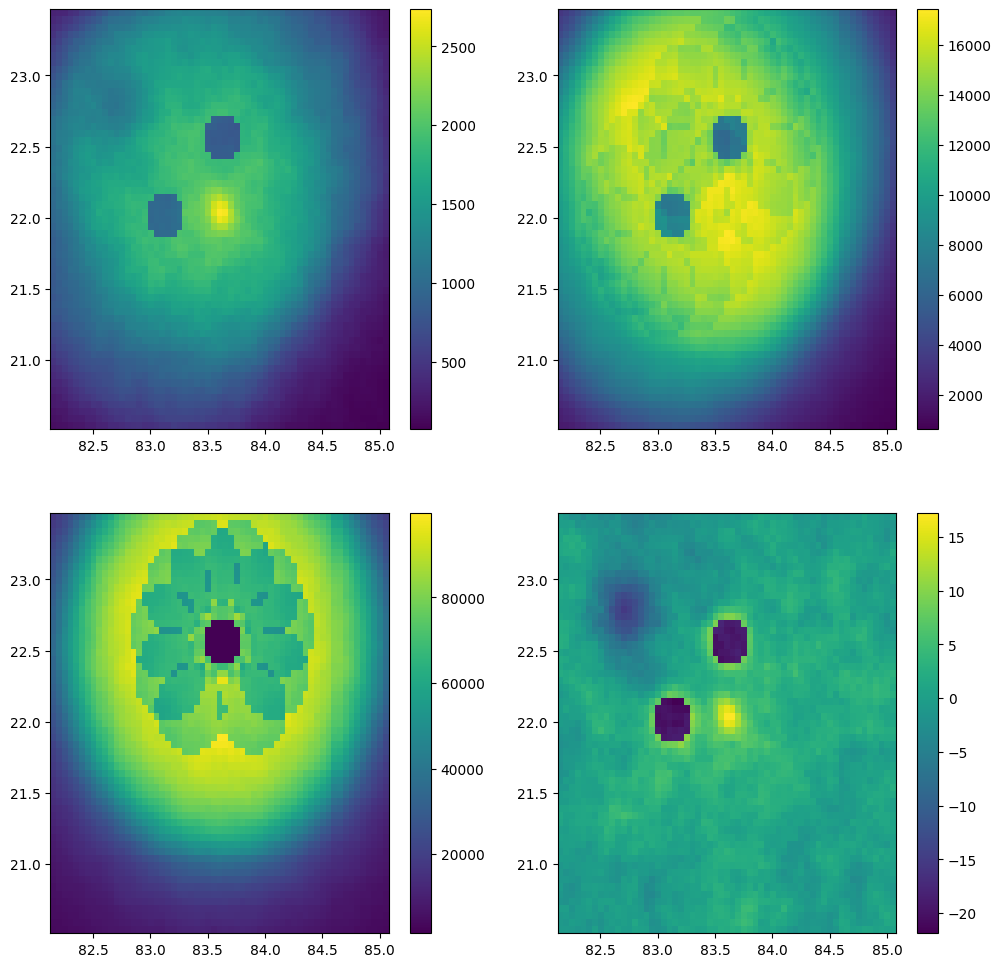

In [18]:
fig, axs = plt.subplots(2,2, figsize = (12,12))

p00 = axs[0,0].pcolormesh(ra_bins, dec_bins, myMaps.on_map)
plt.colorbar(p00, ax=axs[0,0])
p01 = axs[0,1].pcolormesh(ra_bins, dec_bins, myMaps.off_map)
plt.colorbar(p01, ax=axs[0,1])
p10 = axs[1,0].pcolormesh(ra_bins, dec_bins, myMaps.excess_map)
plt.colorbar(p10, ax=axs[1,0])
p11 = axs[1,1].pcolormesh(ra_bins, dec_bins, myMaps.sig_map)
plt.colorbar(p11, ax=axs[1,1])